# Image Embedding

### At its core, image embedding, also referred to as latent vector or representation, is a technique that transforms high-dimensional image data into a more manageable, lower-dimensional numerical representation. This transformation retains crucial information about the original content while discarding redundant or less informative data. Image embeddings are extracted using sophisticated machine learning models, specifically deep neural networks.

## Multiple goals are achieved:

### 1. Dimensionality Reduction: By condensing information, embeddings make complex data easier to analyze and process.
### 2. Feature Extraction: Embeddings highlight essential features of images, facilitating more nuanced insights and applications.
### 3. Similarity Search: On top of this, embeddings form a continuous space such that similar images are embedded in similar vectors.

## The next step usually involves using these embeddings in machine learning, as inputs to predict a desired metric or KPI to solve a business need or perform an analysis with a more handleable dataset due to the reduced dimensionality.

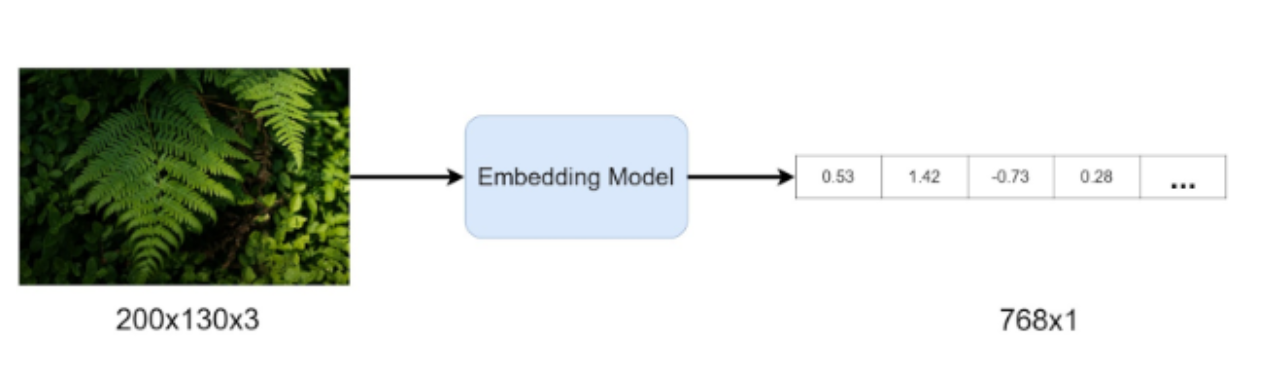

In [1]:
## Links:
## https://dagshub.com/blog/image-embedding-benefits-use-cases-and-best-practices/#:~:text=in%20your%20organization.-,What%20is%20Image%20Embedding%3F,%2C%20lower%2Ddimensional%20numerical%20representation.

### Embeddings are typically obtained using deep learning models like Convolutional Neural Networks (CNNs), which learn to extract important features from images.

## Types of Image Embeddings

### 1. Pretrained CNN Embeddings:
#### Use a pretrained CNN model, such as VGG, ResNet, or Inception, to extract features from an image. These models are usually trained on large datasets (like ImageNet) and can be used directly to compute embeddings.

### 2. Autoencoder-based Embeddings:
#### Autoencoders compress images into a latent space and can be used for embedding. The latent vector from the encoder represents the image embedding.

### 3. Siamese Networks:
#### Siamese networks generate embeddings such that similar images are mapped closer together in the embedding space, typically used for similarity tasks like face recognition.

### 4. Transformer-based Embeddings:
#### Vision Transformers (ViT) convert images into embeddings by treating image patches as tokens, similar to text embeddings in natural language processing.

### 5. CLIP Embeddings:
#### CLIP (Contrastive Language–Image Pretraining) is a model by OpenAI that learns to embed images and text into a shared space. It can be used to find the relationship between images and text.

# 1. Pretrained CNN Embeddings (Using ResNet50)

In [2]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# Load pretrained ResNet50 model
model = models.resnet50(pretrained=True)
model.eval()  # Set model to evaluation mode

# Preprocessing transformation for input image
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load image and apply preprocessing
image = Image.open("sample_image.jpg")
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add batch dimension

# Get image embedding (output of the last layer before classification)
with torch.no_grad():
    embedding = model(input_batch)

print("Image Embedding Shape:", embedding.shape)

C:\Users\Abhishek_Jaiswal\AppData\Local\miniconda3\envs\mlenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Abhishek_Jaiswal\AppData\Local\miniconda3\envs\mlenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\Abhishek_Jaiswal/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|█████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:23<00:00, 4.44MB/s]


Image Embedding Shape: torch.Size([1, 1000])


In [3]:
embedding

tensor([[ 7.5702e-01,  5.4061e-01, -2.9456e+00, -3.3717e+00, -2.4620e+00,
         -2.1444e-01, -3.6074e+00, -1.0222e+00, -5.1309e-01, -3.2064e+00,
         -2.4567e-01, -1.5683e+00, -3.3287e+00, -3.8946e+00, -1.7089e+00,
         -1.6544e+00, -1.6521e+00, -1.9988e+00, -3.1118e+00, -1.4081e+00,
          3.5969e-01,  8.9251e-01, -2.0985e+00, -1.4043e+00, -9.8715e-01,
         -4.7011e-01,  3.3701e-01, -1.0556e+00,  2.5231e-01,  1.0495e+00,
         -9.2765e-01, -1.7591e+00,  7.0320e-01, -2.6338e-01, -2.5852e-01,
         -6.1015e-01,  6.5724e-01, -1.3825e+00,  1.5951e+00, -2.1021e+00,
         -2.4680e+00, -3.1177e-01, -1.1928e+00, -2.3098e-01, -9.5918e-01,
         -1.2450e-01, -3.4223e+00, -4.9176e-01, -2.3504e+00, -2.1777e+00,
         -2.1341e+00,  6.6819e-01,  5.9261e-01,  8.6767e-01,  4.9430e-01,
         -2.4307e+00,  1.4472e+00, -1.3923e+00, -8.5730e-01,  7.7969e-01,
          8.0487e-01, -1.2225e+00,  2.1486e+00,  1.2136e+00, -6.4077e-01,
         -1.0277e+00,  9.6856e-01, -6.

# 2. Autoencoder-based Embeddings

In [6]:
import torch
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        embedding = x.view(x.size(0), -1)  # Flatten for embedding
        return embedding

# Instantiate the model
autoencoder = Autoencoder()

# Example image tensor
image_tensor = torch.randn((1, 3, 64, 64))  # Random image tensor
embedding = autoencoder.encoder(image_tensor)
embedding = embedding.view(embedding.size(0), -1)

print("Autoencoder Image Embedding Shape:", embedding.shape)

Autoencoder Image Embedding Shape: torch.Size([1, 8192])


# 3. Siamese Network for Embedding

import torch
import torch.nn as nn
import torchvision.models as models

# Siamese Network for Embedding
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.cnn = models.resnet18(pretrained=True)
        self.fc = nn.Linear(1000, 128)  # Embedding layer

    def forward(self, x):
        x = self.cnn(x)
        x = self.fc(x)  # Output embedding
        return x

# Instantiate the network
siamese_model = SiameseNetwork()

# Example image tensor
image_tensor = torch.randn((1, 3, 224, 224))
embedding = siamese_model(image_tensor)

print("Siamese Network Image Embedding Shape:", embedding.shape)

# 4. Vision Transformer (ViT) for Embedding

In [ ]:
from transformers import ViTModel, ViTFeatureExtractor
from PIL import Image
import torch

# Load pretrained ViT model and feature extractor
model = ViTModel.from_pretrained('google/vit-base-patch16-224')
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

# Load and preprocess image
image = Image.open("sample_image.jpg")
inputs = feature_extractor(images=image, return_tensors="pt")

# Get the image embedding
with torch.no_grad():
    outputs = model(**inputs)
    embedding = outputs.last_hidden_state[:, 0, :]  # CLS token embedding

print("ViT Image Embedding Shape:", embedding.shape)

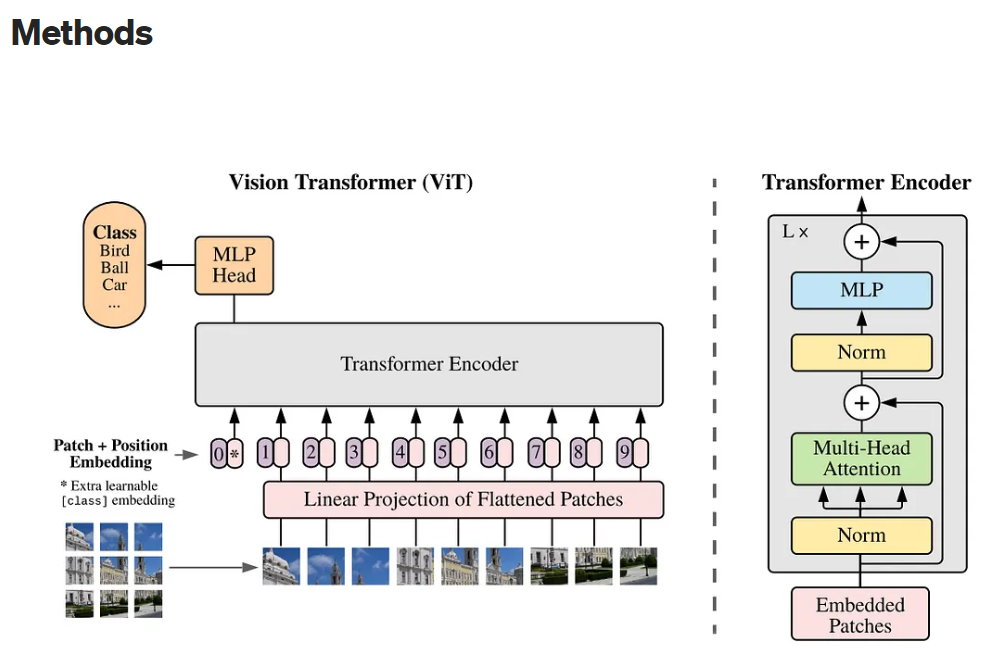

# 5. CLIP for Image and Text Embeddings

In [ ]:
import torch
import clip
from PIL import Image

# Load CLIP model and preprocess function
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Load and preprocess image
image = preprocess(Image.open("path_to_image.jpg")).unsqueeze(0).to(device)

# Get image embedding
with torch.no_grad():
    image_embedding = model.encode_image(image)

print("CLIP Image Embedding Shape:", image_embedding.shape)

## Use Cases for Image Embeddings

### 1. Image Classification: Embeddings can be fed into classifiers like SVMs or fully connected layers to classify images.
### 2. Image Retrieval: By computing embeddings for a query image and comparing them with a database of embeddings, you can retrieve similar images.
### 3. Clustering: Embeddings can be used as input for clustering algorithms like K-means to group similar images.
### 4. Image-Text Matching (CLIP): Use shared embedding spaces for tasks like captioning or finding corresponding text descriptions for images.

In [5]:
#https://viso.ai/deep-learning/vision-transformer-vit/
#https://huggingface.co/blog/vlms